In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Task1

### Number №1

In [104]:
data  = pd.read_csv("transactions.csv")
data = data.drop(columns =['Unnamed: 0'])
sorted_data = data.sort_values(by = ["STATUS", "SUM"])
count = 0
# print three the largest payments
for i in range(len(sorted_data)-1, 0, -1):
    if(sorted_data.iloc[i, 1] == "OK"):
        print(sorted_data.iloc[i, :]) 
        print()
        count+=1
        if count == 3:
            break

CONTRACTOR    Acme, Inc
STATUS               OK
SUM              100500
Name: 5085, dtype: object

CONTRACTOR    Umbrella, Inc
STATUS                   OK
SUM                    1000
Name: 4451, dtype: object

CONTRACTOR    Umbrella, Inc
STATUS                   OK
SUM                     999
Name: 9266, dtype: object



### Number №2

In [92]:
Umbrella_sum = 0
for i in range(1, len(sorted_data)):
    if(sorted_data.iloc[i, 0] =="Umbrella, Inc" and sorted_data.iloc[i, 1] == "OK"):
        Umbrella_sum+=sorted_data.iloc[i, 2]
#print amount that pay for "Umbrella, Inc"
print(Umbrella_sum)
df_sum_of_contractor = data.groupby(by=["CONTRACTOR", "STATUS"]).sum()
df_sum_of_contractor

925719


SUM
CONTRACTOR    STATUS           
Acme, Inc     CANCELED   910835
              OK        1012343
              WAITING    906798
Umbrella, Inc CANCELED   942053
              OK         925719
              WAITING    920602

## Task2

         PRICE  WEIGHT  FLIGHTS
CARGO                          
Jumbo    76795   18709     50.0
Medium   36312    9507    100.0
Nimble  752588    7545    500.0


array([<AxesSubplot:title={'center':'PRICE'}, xlabel='CARGO'>,
       <AxesSubplot:title={'center':'WEIGHT'}, xlabel='CARGO'>,
       <AxesSubplot:title={'center':'FLIGHTS'}, xlabel='CARGO'>],
      dtype=object)

<Figure size 1440x1080 with 0 Axes>

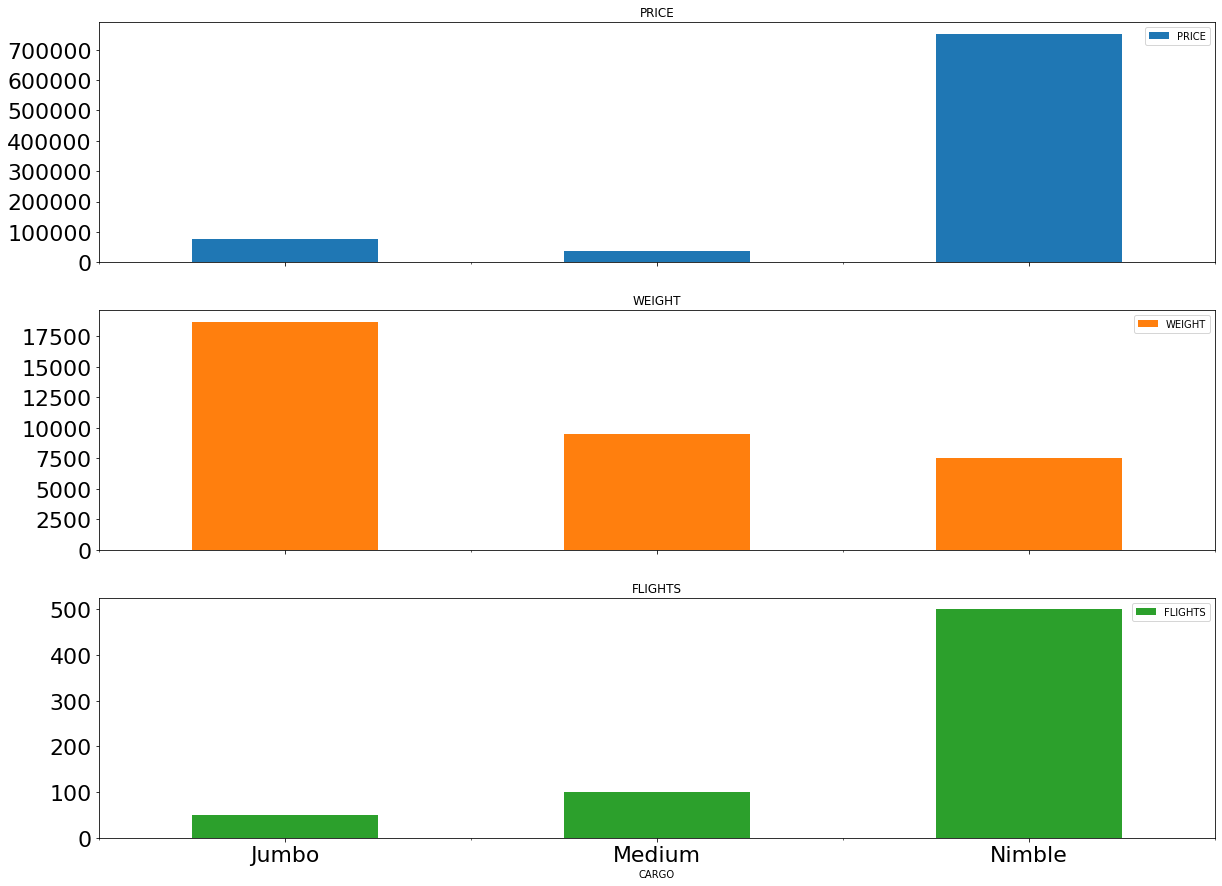

In [77]:
data2 = pd.read_csv("flights.csv")
data2 = data2.drop(columns =['Unnamed: 0'])
data2["FLIGHTS"] = np.ones(len(data2))
data2_sum = data2.groupby(by = ["CARGO"]).sum()
print(data2_sum)
plt.figure(figsize=(20,15))
data2_sum.plot.bar(subplots=True, rot = 0, figsize=(20,15), fontsize = 22)


## Task3

### Number №1

<AxesSubplot:xlabel='group_faculty'>

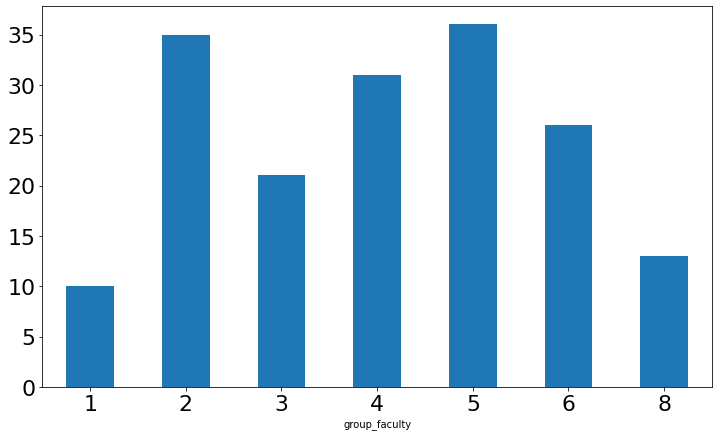

In [86]:
data3_xlsx = pd.read_excel('./students/students_info.xlsx')
data3_html_com = pd.read_html('./students/results_ejudge.html')
data3_html_com[0] = data3_html_com[0].sort_values(by = ["User"])
data3_html_com[0] = data3_html_com[0].rename(columns = {"User":"login"})
data3_xlsx = pd.merge(data3_xlsx, data3_html_com[0],  on = "login")
data3_group_faculty = data3_xlsx.groupby(by = ["group_faculty"])["Solved"].sum()
#histogram for group_faculty
data3_group_faculty.plot.bar(rot = 0, figsize = (12,7), fontsize = 22)

<AxesSubplot:xlabel='group_out'>

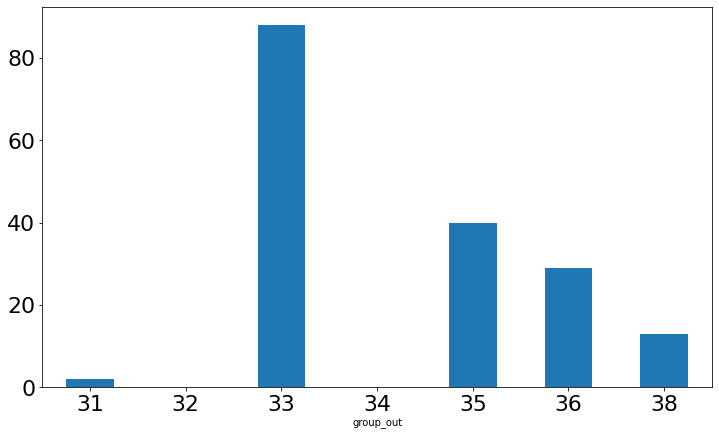

In [87]:
#histogram for group_out
data3_group_out = data3_xlsx.groupby(by = ["group_out"])["Solved"].sum()
data3_group_out.plot.bar(rot = 0, figsize = (12,7), fontsize = 22)

### Number №2

In [89]:
data3_smart_student_H = data3_xlsx[data3_xlsx["H"]>=10]
data3_smart_student_G = data3_xlsx[data3_xlsx["G"]>=10]
data3_smart_student = pd.concat([data3_smart_student_H, data3_smart_student_G])
data3_smart_student = data3_smart_student.drop_duplicates() 
data3_smart_student

,login,group_faculty,group_out,Place,A,B,C,D,E,F,G,H,Solved,Score
18,r0300202,2,33,6,10.0,9.0,20.0,20.0,20.0,30.0,9.0,10.0,6,128
21,r0300205,2,33,1,9.0,10.0,19.0,20.0,20.0,30.0,30.0,49.0,8,187
22,r0300206,2,33,2,10.0,3.0,20.0,20.0,20.0,30.0,30.0,49.0,7,182
25,r0300209,2,33,5,8.0,10.0,14.0,20.0,20.0,30.0,0.0,30.0,5,132
28,r0300212,2,36,20-21,10.0,3.0,20.0,NaN,20.0,NaN,NaN,20.0,3,73
33,r0300301,3,35,24,9.0,5.0,NaN,NaN,NaN,23.0,8.0,23.0,1,68
46,r0300314,3,33,4,9.0,9.0,20.0,20.0,20.0,30.0,9.0,20.0,6,137
61,r0300414,4,33,12,10.0,6.0,20.0,20.0,NaN,30.0,NaN,15.0,4,101
73,r0300511,5,35,18,9.0,9.0,NaN,NaN,NaN,30.0,NaN,29.0,3,77
76,r0300514,5,33,7,10.0,10.0,13.0,18.0,NaN,30.0,NaN,30.0,4,111
